# Analysis of data
In this notebook we'll look at the downloaded data and explore what it tells us

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Point, LineString

In [2]:
geo_data_dir = '../data/geo_data'
weather_data_dir = '../data/weather_data'

* Load the shape file of NYC (this contains the shape files for each location below) and display it

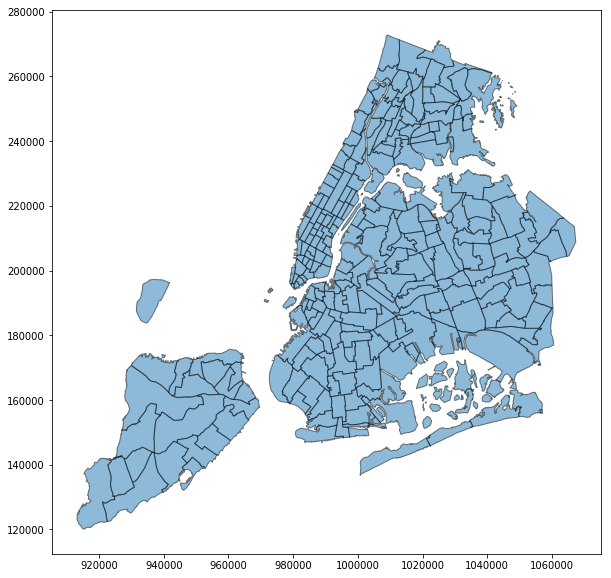

In [3]:
taxi_zones = geopandas.read_file('../data/taxi_zones').set_index('OBJECTID')
zone_ids = taxi_zones.index.tolist()
taxi_zones.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

### Load the taxi data

* Start with green taxi cab data as this is smaller

In [4]:
green_tripdata_file = '../data/taxi_data/consolidated_green_tripdata.csv'
yellow_tripdata_file = '../data/taxi_data/consolidated_yellow_tripdata.csv'

* Load the trip data for green cabs and get its size

In [5]:
green_tripdata = pd.read_csv(green_tripdata_file, delimiter=',')
print(green_tripdata.shape)

(10108112, 8)


* See a sample of green cab trip data

In [6]:
green_tripdata.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,total_amount
0,2,2017-07-01 00:16:40,2017-07-01 00:17:02,264,193,1,0.00,3.80
1,2,2017-07-01 00:56:23,2017-07-01 00:59:30,14,14,1,0.81,5.80
2,2,2017-07-01 00:15:25,2017-07-01 00:34:24,112,61,1,4.97,23.16
3,2,2017-07-01 00:55:06,2017-07-01 00:59:08,92,92,1,0.83,6.80
4,2,2017-07-01 00:34:05,2017-07-01 00:50:44,75,79,1,4.99,19.30
5,2,2017-07-01 00:09:19,2017-07-01 00:16:58,61,188,1,1.72,9.30
6,2,2017-07-01 00:24:20,2017-07-01 00:30:54,188,89,1,1.88,8.80
7,2,2017-07-01 00:41:22,2017-07-01 01:13:02,89,71,1,1.74,21.30
8,2,2017-07-01 00:20:02,2017-07-01 00:39:31,255,129,1,5.85,26.16
9,2,2017-07-01 00:46:38,2017-07-01 01:12:26,255,181,2,6.38,29.75


* Clean up the data by removing rows with NANs, '0' in the data or PULocationID/DOLocationID not in taxi_zones

In [7]:
green_tripdata = green_tripdata[(green_tripdata != 0).all(1)].dropna()
green_tripdata = green_tripdata[(green_tripdata['PULocationID'].isin(zone_ids)) & 
                                (green_tripdata['DOLocationID'].isin(zone_ids))]
print(green_tripdata.shape)

(9946538, 8)


* View green cab trip data again

In [8]:
green_tripdata.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,total_amount
1,2,2017-07-01 00:56:23,2017-07-01 00:59:30,14,14,1,0.81,5.80
2,2,2017-07-01 00:15:25,2017-07-01 00:34:24,112,61,1,4.97,23.16
3,2,2017-07-01 00:55:06,2017-07-01 00:59:08,92,92,1,0.83,6.80
4,2,2017-07-01 00:34:05,2017-07-01 00:50:44,75,79,1,4.99,19.30
5,2,2017-07-01 00:09:19,2017-07-01 00:16:58,61,188,1,1.72,9.30
6,2,2017-07-01 00:24:20,2017-07-01 00:30:54,188,89,1,1.88,8.80
7,2,2017-07-01 00:41:22,2017-07-01 01:13:02,89,71,1,1.74,21.30
8,2,2017-07-01 00:20:02,2017-07-01 00:39:31,255,129,1,5.85,26.16
9,2,2017-07-01 00:46:38,2017-07-01 01:12:26,255,181,2,6.38,29.75
10,2,2017-07-01 00:07:32,2017-07-01 00:10:34,49,49,1,0.84,6.96


* Save this data in its cleansed form for later

In [9]:
green_tripdata.to_csv('../data/taxi_data/cleansed_green_tripdata.csv', sep=',')

### Restart here

TODO - Start by loading the CSV

In [10]:
# green_tripdata = pd.read_csv('../data/taxi_data/cleansed_green_tripdata.csv', delimiter=',')

* Count of each pickup (PU) and drop-off (DO) location ID

In [11]:
green_count_by_PU = green_tripdata.groupby('PULocationID')['PULocationID'].count()
green_count_by_DO = green_tripdata.groupby('DOLocationID')['DOLocationID'].count()

### Render this data on a map of NYC

* Add centroids to each zone

In [12]:
taxi_zones['centroids'] = taxi_zones.geometry.centroid
taxi_zones.head(10)

,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,centroids
OBJECTID,,,,,,,
1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",POINT (935996.8210162065 191376.749530832)
2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",POINT (1031085.718603285 164018.7544032017)
3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",POINT (1026452.616873473 254265.4786585689)
4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",POINT (990633.9806410479 202959.7823911368)
5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",POINT (931871.3700680139 140681.3513759734)
6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",POINT (964319.735448061 157998.9356119239)
7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",POINT (1006496.679158681 216719.2181686789)
8,0.027591,0.000027,Astoria Park,8,Queens,"POLYGON ((1005482.276373357 221686.4661663175,...",POINT (1005551.57117787 222936.0875515854)
9,0.099784,0.000338,Auburndale,9,Queens,"POLYGON ((1043803.993348822 216615.9250395149,...",POINT (1043002.677424325 212969.8490136597)


* This CRS will transform the map into lat/long coordinates

In [13]:
taxi_zones_crs = taxi_zones.crs
print(taxi_zones_crs)
# taxi_zones = taxi_zones.to_crs({'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True})

{'proj': 'lcc', 'lat_1': 40.66666666666666, 'lat_2': 41.03333333333333, 'lat_0': 40.16666666666666, 'lon_0': -74, 'x_0': 300000, 'y_0': 0, 'datum': 'NAD83', 'units': 'us-ft', 'no_defs': True}


* Let's view the shape file from geopandas
(See http://geopandas.org/index.html)

In [14]:
taxi_zones.head(10)

,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,centroids
OBJECTID,,,,,,,
1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,...",POINT (935996.8210162065 191376.749530832)
2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1...",POINT (1031085.718603285 164018.7544032017)
3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,...",POINT (1026452.616873473 254265.4786585689)
4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,...",POINT (990633.9806410479 202959.7823911368)
5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ...",POINT (931871.3700680139 140681.3513759734)
6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.7466657609 158679.854687795, ...",POINT (964319.735448061 157998.9356119239)
7,0.107417,0.000390,Astoria,7,Queens,"POLYGON ((1010804.217962816 218919.6406951398,...",POINT (1006496.679158681 216719.2181686789)
8,0.027591,0.000027,Astoria Park,8,Queens,"POLYGON ((1005482.276373357 221686.4661663175,...",POINT (1005551.57117787 222936.0875515854)
9,0.099784,0.000338,Auburndale,9,Queens,"POLYGON ((1043803.993348822 216615.9250395149,...",POINT (1043002.677424325 212969.8490136597)


* Add the count by ID to the taxi_zone geo dataframe

In [15]:
taxi_zones['Count_by_PULocationID'] = green_count_by_PU
taxi_zones['Count_by_DOLocationID'] = green_count_by_DO

/anaconda3/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.7/site-packa

Text(0.5,1,'Volume of Pickups by Location')

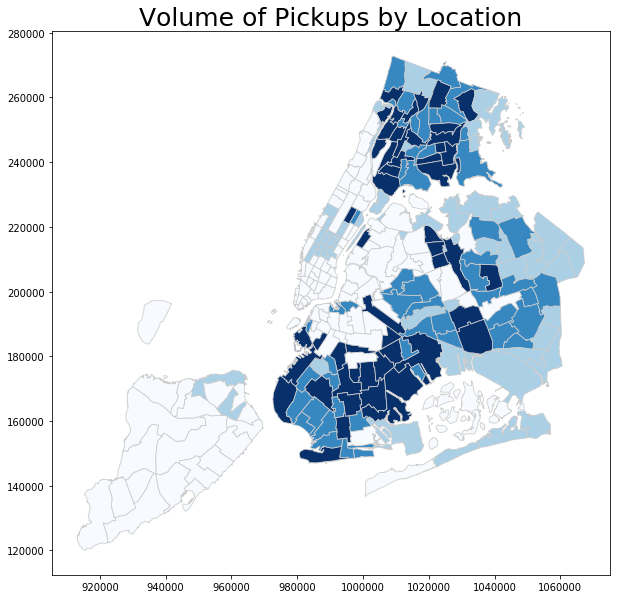

In [16]:
fig, ax = plt.subplots(1, figsize=(10, 10))
taxi_zones.plot(column='Count_by_PULocationID', cmap='Blues', scheme='quantiles', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Volume of Pickups by Location', fontdict={'fontsize': 25, 'fontweight' : 3})

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.7/site-packages/pysal/esda/mapclassify.py:267: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


Text(0.5,1,'Volume of Drop-offs by Location')

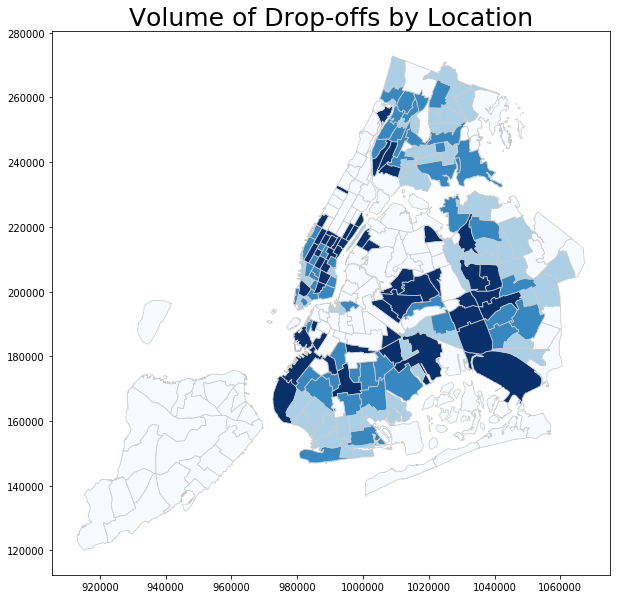

In [17]:
fig, ax = plt.subplots(1, figsize=(10, 10))
taxi_zones.plot(column='Count_by_DOLocationID', cmap='Blues', scheme='quantiles', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('Volume of Drop-offs by Location', fontdict={'fontsize': 25, 'fontweight' : 3})

* Now calculate the number of trips by unique pickup/drop-off combination

In [23]:
green_count_by_trip = green_tripdata.groupby(['PULocationID', 'DOLocationID'])[['PULocationID', 'DOLocationID']].size().reset_index()
green_count_by_trip.rename(columns={0: 'count'}, inplace=True)
green_count_by_trip.head(10)

,PULocationID,DOLocationID,count
0,1,1,33
1,1,23,1
2,1,66,2
3,1,132,1
4,1,166,1
5,1,243,1
6,2,124,2
7,2,196,1
8,2,197,1
9,2,216,1


* Determine linestrings for each unique trip

* Join this table with the lat/long of each centroid so that we can draw lines representing each journey

In [26]:
journeys = []
for i, journey in green_count_by_trip.iterrows():
    # print(journey[['PULocationID', 'DOLocationID']].values)
    start_centroid = taxi_zones.loc[journey['PULocationID'], 'centroids']
    end_centroid = taxi_zones.loc[journey['DOLocationID'], 'centroids']
    #green_count_by_trip.loc[i, 'journey'] = LineString([start_centroid, end_centroid])
    journeys.append(LineString([start_centroid, end_centroid]))
green_count_by_trip['journey'] = journeys

[1 1]
[ 1 23]
[ 1 66]
[  1 132]
[  1 166]
[  1 243]
[  2 124]
[  2 196]
[  2 197]
[  2 216]
[  2 257]
[3 3]
[3 4]
[3 7]
[ 3 10]
[ 3 16]
[ 3 17]
[ 3 18]
[ 3 20]
[ 3 24]
[ 3 25]
[ 3 28]
[ 3 29]
[ 3 30]
[ 3 31]
[ 3 32]
[ 3 37]
[ 3 38]
[ 3 39]
[ 3 41]
[ 3 42]
[ 3 43]
[ 3 45]
[ 3 46]
[ 3 47]
[ 3 48]
[ 3 50]
[ 3 51]
[ 3 53]
[ 3 55]
[ 3 58]
[ 3 59]
[ 3 60]
[ 3 61]
[ 3 65]
[ 3 68]
[ 3 69]
[ 3 70]
[ 3 71]
[ 3 74]
[ 3 75]
[ 3 76]
[ 3 78]
[ 3 79]
[ 3 81]
[ 3 82]
[ 3 85]
[ 3 86]
[ 3 88]
[ 3 90]
[ 3 91]
[ 3 93]
[ 3 94]
[ 3 95]
[ 3 97]
[ 3 98]
[  3 100]
[  3 107]
[  3 108]
[  3 112]
[  3 113]
[  3 116]
[  3 117]
[  3 119]
[  3 122]
[  3 124]
[  3 126]
[  3 127]
[  3 129]
[  3 130]
[  3 132]
[  3 136]
[  3 137]
[  3 138]
[  3 140]
[  3 141]
[  3 142]
[  3 143]
[  3 145]
[  3 146]
[  3 147]
[  3 148]
[  3 152]
[  3 153]
[  3 159]
[  3 160]
[  3 161]
[  3 162]
[  3 163]
[  3 164]
[  3 166]
[  3 167]
[  3 168]
[  3 169]
[  3 170]
[  3 174]
[  3 175]
[  3 177]
[  3 178]
[  3 181]
[  3 182]
[  3 183]
[  3

[14 63]
[14 64]
[14 65]
[14 66]
[14 67]
[14 68]
[14 69]
[14 70]
[14 71]
[14 72]
[14 73]
[14 74]
[14 75]
[14 76]
[14 77]
[14 79]
[14 80]
[14 82]
[14 83]
[14 84]
[14 85]
[14 86]
[14 87]
[14 88]
[14 89]
[14 90]
[14 91]
[14 92]
[14 93]
[14 95]
[14 97]
[14 98]
[14 99]
[ 14 100]
[ 14 101]
[ 14 102]
[ 14 106]
[ 14 107]
[ 14 108]
[ 14 109]
[ 14 111]
[ 14 112]
[ 14 113]
[ 14 114]
[ 14 115]
[ 14 116]
[ 14 117]
[ 14 118]
[ 14 119]
[ 14 121]
[ 14 122]
[ 14 123]
[ 14 124]
[ 14 125]
[ 14 126]
[ 14 129]
[ 14 130]
[ 14 131]
[ 14 132]
[ 14 133]
[ 14 134]
[ 14 135]
[ 14 137]
[ 14 138]
[ 14 139]
[ 14 140]
[ 14 141]
[ 14 142]
[ 14 143]
[ 14 144]
[ 14 145]
[ 14 146]
[ 14 147]
[ 14 148]
[ 14 149]
[ 14 150]
[ 14 151]
[ 14 152]
[ 14 154]
[ 14 155]
[ 14 156]
[ 14 157]
[ 14 158]
[ 14 159]
[ 14 160]
[ 14 161]
[ 14 162]
[ 14 163]
[ 14 164]
[ 14 165]
[ 14 166]
[ 14 168]
[ 14 170]
[ 14 172]
[ 14 173]
[ 14 175]
[ 14 176]
[ 14 177]
[ 14 178]
[ 14 179]
[ 14 180]
[ 14 181]
[ 14 182]
[ 14 186]
[ 14 187]
[ 14 188]
[ 14 1

[ 19 221]
[ 19 222]
[ 19 223]
[ 19 225]
[ 19 226]
[ 19 227]
[ 19 228]
[ 19 229]
[ 19 230]
[ 19 232]
[ 19 237]
[ 19 238]
[ 19 239]
[ 19 242]
[ 19 243]
[ 19 244]
[ 19 250]
[ 19 252]
[ 19 253]
[ 19 257]
[ 19 258]
[ 19 260]
[ 19 262]
[20  3]
[20  4]
[20  7]
[20 10]
[20 13]
[20 14]
[20 17]
[20 18]
[20 20]
[20 24]
[20 25]
[20 26]
[20 28]
[20 31]
[20 32]
[20 33]
[20 34]
[20 35]
[20 36]
[20 37]
[20 39]
[20 41]
[20 42]
[20 43]
[20 46]
[20 47]
[20 48]
[20 49]
[20 50]
[20 51]
[20 52]
[20 53]
[20 54]
[20 55]
[20 56]
[20 58]
[20 59]
[20 60]
[20 61]
[20 63]
[20 65]
[20 66]
[20 67]
[20 68]
[20 69]
[20 70]
[20 74]
[20 75]
[20 76]
[20 77]
[20 78]
[20 79]
[20 81]
[20 82]
[20 83]
[20 85]
[20 87]
[20 88]
[20 89]
[20 90]
[20 91]
[20 92]
[20 94]
[20 95]
[20 97]
[ 20 100]
[ 20 106]
[ 20 107]
[ 20 108]
[ 20 112]
[ 20 114]
[ 20 116]
[ 20 117]
[ 20 119]
[ 20 120]
[ 20 121]
[ 20 124]
[ 20 125]
[ 20 126]
[ 20 127]
[ 20 128]
[ 20 129]
[ 20 130]
[ 20 132]
[ 20 134]
[ 20 135]
[ 20 136]
[ 20 137]
[ 20 138]
[ 20 140]


[ 25 204]
[ 25 205]
[ 25 206]
[ 25 207]
[ 25 208]
[ 25 209]
[ 25 210]
[ 25 211]
[ 25 212]
[ 25 213]
[ 25 214]
[ 25 215]
[ 25 216]
[ 25 217]
[ 25 218]
[ 25 219]
[ 25 220]
[ 25 221]
[ 25 222]
[ 25 223]
[ 25 224]
[ 25 225]
[ 25 226]
[ 25 227]
[ 25 228]
[ 25 229]
[ 25 230]
[ 25 231]
[ 25 232]
[ 25 233]
[ 25 234]
[ 25 235]
[ 25 236]
[ 25 237]
[ 25 238]
[ 25 239]
[ 25 240]
[ 25 241]
[ 25 242]
[ 25 243]
[ 25 244]
[ 25 245]
[ 25 246]
[ 25 247]
[ 25 248]
[ 25 249]
[ 25 250]
[ 25 251]
[ 25 252]
[ 25 254]
[ 25 255]
[ 25 256]
[ 25 257]
[ 25 258]
[ 25 259]
[ 25 260]
[ 25 261]
[ 25 262]
[ 25 263]
[26  3]
[26  4]
[26  7]
[26  9]
[26 11]
[26 13]
[26 14]
[26 17]
[26 18]
[26 19]
[26 20]
[26 21]
[26 22]
[26 23]
[26 25]
[26 26]
[26 27]
[26 28]
[26 29]
[26 32]
[26 33]
[26 34]
[26 35]
[26 36]
[26 37]
[26 39]
[26 40]
[26 42]
[26 43]
[26 45]
[26 47]
[26 48]
[26 49]
[26 50]
[26 51]
[26 52]
[26 54]
[26 55]
[26 56]
[26 60]
[26 61]
[26 62]
[26 63]
[26 65]
[26 66]
[26 67]
[26 68]
[26 69]
[26 70]
[26 71]
[26 72]
[2

[ 32 148]
[ 32 149]
[ 32 151]
[ 32 152]
[ 32 153]
[ 32 155]
[ 32 158]
[ 32 159]
[ 32 161]
[ 32 162]
[ 32 163]
[ 32 164]
[ 32 166]
[ 32 167]
[ 32 168]
[ 32 169]
[ 32 170]
[ 32 173]
[ 32 174]
[ 32 177]
[ 32 178]
[ 32 179]
[ 32 181]
[ 32 182]
[ 32 183]
[ 32 184]
[ 32 185]
[ 32 186]
[ 32 188]
[ 32 191]
[ 32 192]
[ 32 193]
[ 32 196]
[ 32 197]
[ 32 198]
[ 32 200]
[ 32 201]
[ 32 205]
[ 32 208]
[ 32 210]
[ 32 212]
[ 32 213]
[ 32 215]
[ 32 216]
[ 32 218]
[ 32 220]
[ 32 223]
[ 32 226]
[ 32 227]
[ 32 228]
[ 32 229]
[ 32 230]
[ 32 231]
[ 32 232]
[ 32 233]
[ 32 234]
[ 32 235]
[ 32 236]
[ 32 237]
[ 32 238]
[ 32 239]
[ 32 240]
[ 32 241]
[ 32 242]
[ 32 243]
[ 32 244]
[ 32 245]
[ 32 246]
[ 32 247]
[ 32 248]
[ 32 249]
[ 32 250]
[ 32 252]
[ 32 254]
[ 32 256]
[ 32 258]
[ 32 259]
[ 32 261]
[ 32 262]
[ 32 263]
[33  1]
[33  3]
[33  4]
[33  5]
[33  6]
[33  7]
[33  9]
[33 10]
[33 11]
[33 12]
[33 13]
[33 14]
[33 15]
[33 16]
[33 17]
[33 18]
[33 19]
[33 20]
[33 21]
[33 22]
[33 23]
[33 24]
[33 25]
[33 26]
[33 27]


[37 20]
[37 21]
[37 22]
[37 23]
[37 24]
[37 25]
[37 26]
[37 27]
[37 28]
[37 29]
[37 32]
[37 33]
[37 34]
[37 35]
[37 36]
[37 37]
[37 38]
[37 39]
[37 40]
[37 41]
[37 42]
[37 43]
[37 45]
[37 47]
[37 48]
[37 49]
[37 50]
[37 51]
[37 52]
[37 53]
[37 54]
[37 55]
[37 56]
[37 57]
[37 58]
[37 59]
[37 60]
[37 61]
[37 62]
[37 63]
[37 64]
[37 65]
[37 66]
[37 67]
[37 68]
[37 69]
[37 70]
[37 71]
[37 72]
[37 73]
[37 74]
[37 75]
[37 76]
[37 77]
[37 78]
[37 79]
[37 80]
[37 81]
[37 82]
[37 83]
[37 85]
[37 86]
[37 87]
[37 88]
[37 89]
[37 90]
[37 91]
[37 92]
[37 93]
[37 94]
[37 95]
[37 96]
[37 97]
[37 98]
[ 37 100]
[ 37 101]
[ 37 102]
[ 37 106]
[ 37 107]
[ 37 108]
[ 37 111]
[ 37 112]
[ 37 113]
[ 37 114]
[ 37 116]
[ 37 117]
[ 37 119]
[ 37 121]
[ 37 122]
[ 37 123]
[ 37 124]
[ 37 125]
[ 37 126]
[ 37 127]
[ 37 129]
[ 37 130]
[ 37 131]
[ 37 132]
[ 37 133]
[ 37 134]
[ 37 135]
[ 37 136]
[ 37 137]
[ 37 138]
[ 37 139]
[ 37 140]
[ 37 141]
[ 37 142]
[ 37 143]
[ 37 144]
[ 37 145]
[ 37 146]
[ 37 147]
[ 37 148]
[ 37 149

[ 41 165]
[ 41 166]
[ 41 167]
[ 41 168]
[ 41 169]
[ 41 170]
[ 41 171]
[ 41 173]
[ 41 174]
[ 41 175]
[ 41 177]
[ 41 178]
[ 41 179]
[ 41 180]
[ 41 181]
[ 41 182]
[ 41 183]
[ 41 184]
[ 41 185]
[ 41 186]
[ 41 187]
[ 41 188]
[ 41 189]
[ 41 190]
[ 41 191]
[ 41 192]
[ 41 193]
[ 41 194]
[ 41 195]
[ 41 196]
[ 41 197]
[ 41 198]
[ 41 200]
[ 41 201]
[ 41 202]
[ 41 203]
[ 41 205]
[ 41 206]
[ 41 207]
[ 41 208]
[ 41 209]
[ 41 210]
[ 41 211]
[ 41 212]
[ 41 213]
[ 41 214]
[ 41 215]
[ 41 216]
[ 41 217]
[ 41 218]
[ 41 219]
[ 41 220]
[ 41 221]
[ 41 222]
[ 41 223]
[ 41 224]
[ 41 225]
[ 41 226]
[ 41 227]
[ 41 228]
[ 41 229]
[ 41 230]
[ 41 231]
[ 41 232]
[ 41 233]
[ 41 234]
[ 41 235]
[ 41 236]
[ 41 237]
[ 41 238]
[ 41 239]
[ 41 240]
[ 41 241]
[ 41 242]
[ 41 243]
[ 41 244]
[ 41 246]
[ 41 247]
[ 41 248]
[ 41 249]
[ 41 250]
[ 41 252]
[ 41 253]
[ 41 254]
[ 41 255]
[ 41 256]
[ 41 257]
[ 41 258]
[ 41 259]
[ 41 260]
[ 41 261]
[ 41 262]
[ 41 263]
[42  1]
[42  3]
[42  4]
[42  6]
[42  7]
[42  8]
[42  9]
[42 10]
[42 11

[49 18]
[49 20]
[49 21]
[49 22]
[49 23]
[49 24]
[49 25]
[49 26]
[49 27]
[49 28]
[49 29]
[49 31]
[49 32]
[49 33]
[49 34]
[49 35]
[49 36]
[49 37]
[49 38]
[49 39]
[49 40]
[49 41]
[49 42]
[49 43]
[49 44]
[49 45]
[49 46]
[49 47]
[49 48]
[49 49]
[49 50]
[49 51]
[49 52]
[49 53]
[49 54]
[49 55]
[49 56]
[49 60]
[49 61]
[49 62]
[49 63]
[49 65]
[49 66]
[49 67]
[49 68]
[49 69]
[49 70]
[49 71]
[49 72]
[49 73]
[49 74]
[49 75]
[49 76]
[49 77]
[49 78]
[49 79]
[49 80]
[49 81]
[49 82]
[49 83]
[49 85]
[49 86]
[49 87]
[49 88]
[49 89]
[49 90]
[49 91]
[49 92]
[49 93]
[49 94]
[49 95]
[49 96]
[49 97]
[49 98]
[ 49 100]
[ 49 101]
[ 49 102]
[ 49 106]
[ 49 107]
[ 49 108]
[ 49 109]
[ 49 111]
[ 49 112]
[ 49 113]
[ 49 114]
[ 49 115]
[ 49 116]
[ 49 117]
[ 49 118]
[ 49 119]
[ 49 120]
[ 49 121]
[ 49 122]
[ 49 123]
[ 49 124]
[ 49 125]
[ 49 126]
[ 49 127]
[ 49 128]
[ 49 129]
[ 49 130]
[ 49 131]
[ 49 132]
[ 49 133]
[ 49 134]
[ 49 135]
[ 49 136]
[ 49 137]
[ 49 138]
[ 49 139]
[ 49 140]
[ 49 141]
[ 49 142]
[ 49 143]
[ 49 144

[55 24]
[55 25]
[55 26]
[55 27]
[55 28]
[55 29]
[55 30]
[55 31]
[55 32]
[55 33]
[55 34]
[55 35]
[55 36]
[55 37]
[55 38]
[55 39]
[55 40]
[55 41]
[55 42]
[55 43]
[55 44]
[55 45]
[55 47]
[55 48]
[55 49]
[55 50]
[55 51]
[55 52]
[55 53]
[55 54]
[55 55]
[55 56]
[55 57]
[55 59]
[55 60]
[55 61]
[55 62]
[55 63]
[55 64]
[55 65]
[55 66]
[55 67]
[55 68]
[55 69]
[55 70]
[55 71]
[55 72]
[55 73]
[55 74]
[55 75]
[55 76]
[55 77]
[55 78]
[55 79]
[55 80]
[55 81]
[55 82]
[55 83]
[55 84]
[55 85]
[55 86]
[55 87]
[55 88]
[55 89]
[55 90]
[55 91]
[55 92]
[55 93]
[55 94]
[55 95]
[55 96]
[55 97]
[55 98]
[ 55 100]
[ 55 101]
[ 55 102]
[ 55 106]
[ 55 107]
[ 55 108]
[ 55 111]
[ 55 112]
[ 55 113]
[ 55 114]
[ 55 115]
[ 55 116]
[ 55 117]
[ 55 118]
[ 55 119]
[ 55 120]
[ 55 121]
[ 55 122]
[ 55 123]
[ 55 124]
[ 55 125]
[ 55 126]
[ 55 127]
[ 55 129]
[ 55 130]
[ 55 131]
[ 55 132]
[ 55 133]
[ 55 134]
[ 55 135]
[ 55 136]
[ 55 137]
[ 55 138]
[ 55 139]
[ 55 140]
[ 55 141]
[ 55 142]
[ 55 143]
[ 55 144]
[ 55 145]
[ 55 146]
[ 55 1

[61 95]
[61 96]
[61 97]
[61 98]
[ 61 100]
[ 61 101]
[ 61 102]
[ 61 106]
[ 61 107]
[ 61 108]
[ 61 111]
[ 61 112]
[ 61 113]
[ 61 114]
[ 61 115]
[ 61 116]
[ 61 117]
[ 61 118]
[ 61 119]
[ 61 121]
[ 61 122]
[ 61 123]
[ 61 124]
[ 61 125]
[ 61 126]
[ 61 127]
[ 61 129]
[ 61 130]
[ 61 131]
[ 61 132]
[ 61 133]
[ 61 134]
[ 61 135]
[ 61 136]
[ 61 137]
[ 61 138]
[ 61 139]
[ 61 140]
[ 61 141]
[ 61 142]
[ 61 143]
[ 61 144]
[ 61 145]
[ 61 146]
[ 61 147]
[ 61 148]
[ 61 149]
[ 61 150]
[ 61 151]
[ 61 152]
[ 61 153]
[ 61 154]
[ 61 155]
[ 61 156]
[ 61 157]
[ 61 158]
[ 61 159]
[ 61 160]
[ 61 161]
[ 61 162]
[ 61 163]
[ 61 164]
[ 61 165]
[ 61 166]
[ 61 167]
[ 61 168]
[ 61 169]
[ 61 170]
[ 61 171]
[ 61 173]
[ 61 174]
[ 61 175]
[ 61 177]
[ 61 178]
[ 61 179]
[ 61 180]
[ 61 181]
[ 61 182]
[ 61 183]
[ 61 184]
[ 61 185]
[ 61 186]
[ 61 187]
[ 61 188]
[ 61 189]
[ 61 190]
[ 61 191]
[ 61 192]
[ 61 193]
[ 61 194]
[ 61 195]
[ 61 196]
[ 61 197]
[ 61 198]
[ 61 200]
[ 61 201]
[ 61 202]
[ 61 203]
[ 61 205]
[ 61 206]
[ 61 207

[66 70]
[66 71]
[66 72]
[66 73]
[66 74]
[66 75]
[66 76]
[66 77]
[66 78]
[66 79]
[66 80]
[66 82]
[66 83]
[66 84]
[66 85]
[66 86]
[66 87]
[66 88]
[66 89]
[66 90]
[66 91]
[66 92]
[66 93]
[66 94]
[66 95]
[66 96]
[66 97]
[66 98]
[ 66 100]
[ 66 101]
[ 66 102]
[ 66 106]
[ 66 107]
[ 66 108]
[ 66 109]
[ 66 111]
[ 66 112]
[ 66 113]
[ 66 114]
[ 66 115]
[ 66 116]
[ 66 117]
[ 66 118]
[ 66 119]
[ 66 121]
[ 66 123]
[ 66 124]
[ 66 125]
[ 66 126]
[ 66 127]
[ 66 128]
[ 66 129]
[ 66 130]
[ 66 131]
[ 66 132]
[ 66 133]
[ 66 134]
[ 66 135]
[ 66 136]
[ 66 137]
[ 66 138]
[ 66 139]
[ 66 140]
[ 66 141]
[ 66 142]
[ 66 143]
[ 66 144]
[ 66 145]
[ 66 146]
[ 66 147]
[ 66 148]
[ 66 149]
[ 66 150]
[ 66 151]
[ 66 152]
[ 66 153]
[ 66 154]
[ 66 155]
[ 66 157]
[ 66 158]
[ 66 159]
[ 66 160]
[ 66 161]
[ 66 162]
[ 66 163]
[ 66 164]
[ 66 165]
[ 66 166]
[ 66 167]
[ 66 168]
[ 66 169]
[ 66 170]
[ 66 171]
[ 66 172]
[ 66 173]
[ 66 175]
[ 66 176]
[ 66 177]
[ 66 178]
[ 66 179]
[ 66 180]
[ 66 181]
[ 66 182]
[ 66 185]
[ 66 186]
[ 66 1

[ 71 193]
[ 71 195]
[ 71 196]
[ 71 197]
[ 71 198]
[ 71 201]
[ 71 203]
[ 71 205]
[ 71 206]
[ 71 207]
[ 71 208]
[ 71 209]
[ 71 210]
[ 71 211]
[ 71 212]
[ 71 215]
[ 71 216]
[ 71 217]
[ 71 218]
[ 71 219]
[ 71 221]
[ 71 222]
[ 71 224]
[ 71 225]
[ 71 226]
[ 71 227]
[ 71 228]
[ 71 229]
[ 71 230]
[ 71 231]
[ 71 232]
[ 71 233]
[ 71 234]
[ 71 235]
[ 71 236]
[ 71 237]
[ 71 238]
[ 71 239]
[ 71 240]
[ 71 242]
[ 71 243]
[ 71 246]
[ 71 247]
[ 71 248]
[ 71 249]
[ 71 250]
[ 71 251]
[ 71 254]
[ 71 255]
[ 71 256]
[ 71 257]
[ 71 258]
[ 71 259]
[ 71 260]
[ 71 261]
[ 71 262]
[ 71 263]
[72  3]
[72  4]
[72  7]
[72 10]
[72 11]
[72 12]
[72 13]
[72 14]
[72 16]
[72 17]
[72 18]
[72 19]
[72 20]
[72 21]
[72 22]
[72 24]
[72 25]
[72 26]
[72 28]
[72 29]
[72 31]
[72 32]
[72 33]
[72 34]
[72 35]
[72 36]
[72 37]
[72 38]
[72 39]
[72 40]
[72 41]
[72 42]
[72 43]
[72 45]
[72 46]
[72 47]
[72 48]
[72 49]
[72 50]
[72 51]
[72 52]
[72 53]
[72 54]
[72 55]
[72 56]
[72 59]
[72 61]
[72 62]
[72 63]
[72 65]
[72 66]
[72 67]
[72 68]
[72 69

[76 68]
[76 69]
[76 70]
[76 71]
[76 72]
[76 74]
[76 75]
[76 76]
[76 77]
[76 78]
[76 79]
[76 80]
[76 81]
[76 82]
[76 83]
[76 85]
[76 86]
[76 87]
[76 88]
[76 89]
[76 90]
[76 91]
[76 92]
[76 93]
[76 94]
[76 95]
[76 96]
[76 97]
[76 98]
[ 76 100]
[ 76 101]
[ 76 102]
[ 76 106]
[ 76 107]
[ 76 108]
[ 76 112]
[ 76 113]
[ 76 114]
[ 76 115]
[ 76 116]
[ 76 117]
[ 76 119]
[ 76 121]
[ 76 122]
[ 76 123]
[ 76 124]
[ 76 125]
[ 76 126]
[ 76 127]
[ 76 129]
[ 76 130]
[ 76 131]
[ 76 132]
[ 76 133]
[ 76 134]
[ 76 135]
[ 76 136]
[ 76 137]
[ 76 138]
[ 76 139]
[ 76 140]
[ 76 141]
[ 76 142]
[ 76 143]
[ 76 144]
[ 76 145]
[ 76 146]
[ 76 147]
[ 76 148]
[ 76 149]
[ 76 150]
[ 76 151]
[ 76 152]
[ 76 153]
[ 76 154]
[ 76 155]
[ 76 156]
[ 76 157]
[ 76 158]
[ 76 159]
[ 76 160]
[ 76 161]
[ 76 162]
[ 76 163]
[ 76 164]
[ 76 165]
[ 76 166]
[ 76 167]
[ 76 168]
[ 76 169]
[ 76 170]
[ 76 173]
[ 76 174]
[ 76 175]
[ 76 177]
[ 76 178]
[ 76 179]
[ 76 180]
[ 76 181]
[ 76 182]
[ 76 183]
[ 76 185]
[ 76 186]
[ 76 187]
[ 76 188]
[ 76 189

[ 81 162]
[ 81 163]
[ 81 164]
[ 81 165]
[ 81 166]
[ 81 167]
[ 81 168]
[ 81 169]
[ 81 170]
[ 81 173]
[ 81 174]
[ 81 177]
[ 81 178]
[ 81 181]
[ 81 182]
[ 81 183]
[ 81 184]
[ 81 185]
[ 81 186]
[ 81 187]
[ 81 188]
[ 81 189]
[ 81 190]
[ 81 191]
[ 81 192]
[ 81 194]
[ 81 195]
[ 81 196]
[ 81 197]
[ 81 200]
[ 81 201]
[ 81 203]
[ 81 205]
[ 81 208]
[ 81 209]
[ 81 211]
[ 81 212]
[ 81 213]
[ 81 216]
[ 81 217]
[ 81 218]
[ 81 219]
[ 81 220]
[ 81 224]
[ 81 225]
[ 81 226]
[ 81 227]
[ 81 228]
[ 81 229]
[ 81 230]
[ 81 231]
[ 81 232]
[ 81 233]
[ 81 234]
[ 81 235]
[ 81 236]
[ 81 237]
[ 81 238]
[ 81 239]
[ 81 240]
[ 81 241]
[ 81 242]
[ 81 243]
[ 81 244]
[ 81 245]
[ 81 246]
[ 81 247]
[ 81 248]
[ 81 249]
[ 81 250]
[ 81 254]
[ 81 256]
[ 81 259]
[ 81 260]
[ 81 261]
[ 81 262]
[82  1]
[82  2]
[82  3]
[82  4]
[82  5]
[82  7]
[82  8]
[82  9]
[82 10]
[82 11]
[82 12]
[82 13]
[82 14]
[82 15]
[82 16]
[82 17]
[82 18]
[82 19]
[82 20]
[82 21]
[82 22]
[82 23]
[82 24]
[82 25]
[82 26]
[82 27]
[82 28]
[82 29]
[82 30]
[82 31]


[ 86 237]
[ 86 238]
[ 86 239]
[ 86 241]
[ 86 248]
[ 86 254]
[ 86 256]
[ 86 260]
[ 86 261]
[ 86 263]
[87  4]
[87 10]
[87 25]
[87 41]
[87 45]
[87 50]
[87 65]
[87 68]
[87 87]
[87 97]
[ 87 107]
[ 87 114]
[ 87 132]
[ 87 138]
[ 87 141]
[ 87 142]
[ 87 144]
[ 87 148]
[ 87 150]
[ 87 162]
[ 87 170]
[ 87 186]
[ 87 209]
[ 87 211]
[ 87 228]
[ 87 229]
[ 87 230]
[ 87 232]
[ 87 233]
[ 87 234]
[ 87 238]
[ 87 249]
[ 87 255]
[ 87 261]
[88 13]
[88 65]
[88 68]
[88 79]
[88 87]
[ 88 102]
[ 88 113]
[ 88 130]
[ 88 134]
[ 88 143]
[ 88 144]
[ 88 148]
[ 88 158]
[ 88 170]
[ 88 211]
[ 88 224]
[ 88 261]
[89  1]
[89  2]
[89  3]
[89  4]
[89  7]
[89 10]
[89 11]
[89 12]
[89 13]
[89 14]
[89 17]
[89 18]
[89 19]
[89 20]
[89 21]
[89 22]
[89 23]
[89 24]
[89 25]
[89 26]
[89 27]
[89 28]
[89 29]
[89 32]
[89 33]
[89 34]
[89 35]
[89 36]
[89 37]
[89 38]
[89 39]
[89 40]
[89 41]
[89 42]
[89 43]
[89 45]
[89 47]
[89 48]
[89 49]
[89 50]
[89 51]
[89 52]
[89 53]
[89 54]
[89 55]
[89 56]
[89 57]
[89 60]
[89 61]
[89 62]
[89 63]
[89 65]
[89 

[ 94 112]
[ 94 113]
[ 94 114]
[ 94 116]
[ 94 119]
[ 94 120]
[ 94 123]
[ 94 125]
[ 94 126]
[ 94 127]
[ 94 128]
[ 94 129]
[ 94 130]
[ 94 132]
[ 94 133]
[ 94 136]
[ 94 137]
[ 94 138]
[ 94 140]
[ 94 141]
[ 94 142]
[ 94 143]
[ 94 145]
[ 94 146]
[ 94 147]
[ 94 148]
[ 94 151]
[ 94 152]
[ 94 153]
[ 94 158]
[ 94 159]
[ 94 160]
[ 94 161]
[ 94 162]
[ 94 164]
[ 94 166]
[ 94 167]
[ 94 168]
[ 94 169]
[ 94 170]
[ 94 173]
[ 94 174]
[ 94 177]
[ 94 179]
[ 94 181]
[ 94 182]
[ 94 183]
[ 94 184]
[ 94 185]
[ 94 186]
[ 94 188]
[ 94 193]
[ 94 195]
[ 94 200]
[ 94 201]
[ 94 205]
[ 94 208]
[ 94 210]
[ 94 212]
[ 94 213]
[ 94 216]
[ 94 219]
[ 94 220]
[ 94 222]
[ 94 223]
[ 94 225]
[ 94 226]
[ 94 227]
[ 94 228]
[ 94 229]
[ 94 230]
[ 94 231]
[ 94 232]
[ 94 233]
[ 94 234]
[ 94 235]
[ 94 236]
[ 94 237]
[ 94 238]
[ 94 239]
[ 94 240]
[ 94 241]
[ 94 242]
[ 94 243]
[ 94 244]
[ 94 247]
[ 94 248]
[ 94 249]
[ 94 250]
[ 94 254]
[ 94 259]
[ 94 260]
[ 94 263]
[95  1]
[95  2]
[95  3]
[95  4]
[95  6]
[95  7]
[95  8]
[95  9]
[95 10

[101  97]
[101  98]
[101 101]
[101 102]
[101 107]
[101 108]
[101 114]
[101 116]
[101 117]
[101 121]
[101 122]
[101 123]
[101 124]
[101 127]
[101 129]
[101 130]
[101 131]
[101 132]
[101 134]
[101 135]
[101 137]
[101 138]
[101 139]
[101 140]
[101 141]
[101 142]
[101 143]
[101 145]
[101 146]
[101 147]
[101 149]
[101 150]
[101 157]
[101 159]
[101 162]
[101 163]
[101 165]
[101 166]
[101 167]
[101 170]
[101 171]
[101 173]
[101 175]
[101 179]
[101 180]
[101 181]
[101 186]
[101 189]
[101 191]
[101 192]
[101 196]
[101 197]
[101 198]
[101 200]
[101 201]
[101 203]
[101 205]
[101 208]
[101 210]
[101 212]
[101 213]
[101 215]
[101 216]
[101 218]
[101 219]
[101 220]
[101 222]
[101 223]
[101 225]
[101 226]
[101 227]
[101 229]
[101 230]
[101 231]
[101 233]
[101 234]
[101 236]
[101 237]
[101 238]
[101 239]
[101 249]
[101 252]
[101 254]
[101 255]
[101 258]
[101 260]
[101 263]
[102   2]
[102   7]
[102   9]
[102  10]
[102  11]
[102  14]
[102  15]
[102  16]
[102  17]
[102  19]
[102  20]
[102  21]
[102  22]


[112 164]
[112 165]
[112 166]
[112 167]
[112 168]
[112 169]
[112 170]
[112 171]
[112 172]
[112 173]
[112 174]
[112 175]
[112 176]
[112 177]
[112 178]
[112 179]
[112 180]
[112 181]
[112 182]
[112 183]
[112 184]
[112 186]
[112 188]
[112 189]
[112 190]
[112 191]
[112 192]
[112 193]
[112 194]
[112 195]
[112 196]
[112 197]
[112 198]
[112 200]
[112 201]
[112 202]
[112 203]
[112 205]
[112 206]
[112 207]
[112 208]
[112 209]
[112 210]
[112 211]
[112 212]
[112 213]
[112 215]
[112 216]
[112 217]
[112 218]
[112 219]
[112 220]
[112 221]
[112 222]
[112 223]
[112 224]
[112 225]
[112 226]
[112 227]
[112 228]
[112 229]
[112 230]
[112 231]
[112 232]
[112 233]
[112 234]
[112 235]
[112 236]
[112 237]
[112 238]
[112 239]
[112 240]
[112 241]
[112 242]
[112 243]
[112 244]
[112 245]
[112 246]
[112 247]
[112 248]
[112 249]
[112 250]
[112 252]
[112 253]
[112 254]
[112 255]
[112 256]
[112 257]
[112 258]
[112 259]
[112 260]
[112 261]
[112 262]
[112 263]
[113  13]
[113  17]
[113  19]
[113  45]
[113  48]
[113  50]


[120 159]
[120 161]
[120 162]
[120 163]
[120 166]
[120 167]
[120 168]
[120 169]
[120 173]
[120 174]
[120 182]
[120 185]
[120 186]
[120 188]
[120 189]
[120 193]
[120 197]
[120 200]
[120 202]
[120 205]
[120 208]
[120 212]
[120 213]
[120 216]
[120 220]
[120 223]
[120 226]
[120 227]
[120 229]
[120 230]
[120 231]
[120 232]
[120 233]
[120 234]
[120 235]
[120 236]
[120 237]
[120 238]
[120 239]
[120 240]
[120 241]
[120 242]
[120 243]
[120 244]
[120 247]
[120 248]
[120 249]
[120 250]
[120 254]
[120 255]
[120 258]
[120 259]
[120 260]
[120 262]
[120 263]
[121   1]
[121   4]
[121   7]
[121   9]
[121  10]
[121  11]
[121  14]
[121  15]
[121  16]
[121  17]
[121  19]
[121  21]
[121  22]
[121  24]
[121  25]
[121  26]
[121  28]
[121  29]
[121  30]
[121  32]
[121  33]
[121  34]
[121  35]
[121  36]
[121  37]
[121  38]
[121  39]
[121  40]
[121  41]
[121  42]
[121  43]
[121  45]
[121  47]
[121  48]
[121  49]
[121  50]
[121  53]
[121  55]
[121  56]
[121  57]
[121  61]
[121  62]
[121  63]
[121  64]
[121  65]


[126 223]
[126 224]
[126 225]
[126 226]
[126 227]
[126 229]
[126 230]
[126 231]
[126 232]
[126 233]
[126 234]
[126 235]
[126 236]
[126 237]
[126 238]
[126 239]
[126 240]
[126 241]
[126 242]
[126 243]
[126 244]
[126 246]
[126 247]
[126 248]
[126 249]
[126 250]
[126 252]
[126 254]
[126 255]
[126 256]
[126 257]
[126 258]
[126 259]
[126 260]
[126 261]
[126 262]
[126 263]
[127   1]
[127   3]
[127   4]
[127   7]
[127   9]
[127  10]
[127  12]
[127  13]
[127  14]
[127  16]
[127  17]
[127  18]
[127  19]
[127  20]
[127  22]
[127  24]
[127  25]
[127  26]
[127  28]
[127  29]
[127  31]
[127  32]
[127  33]
[127  35]
[127  36]
[127  37]
[127  38]
[127  39]
[127  40]
[127  41]
[127  42]
[127  43]
[127  45]
[127  46]
[127  47]
[127  48]
[127  49]
[127  50]
[127  51]
[127  55]
[127  56]
[127  59]
[127  60]
[127  61]
[127  62]
[127  63]
[127  64]
[127  65]
[127  66]
[127  68]
[127  69]
[127  70]
[127  71]
[127  72]
[127  73]
[127  74]
[127  75]
[127  76]
[127  77]
[127  78]
[127  79]
[127  80]
[127  81]


[131 138]
[131 139]
[131 140]
[131 141]
[131 142]
[131 143]
[131 145]
[131 146]
[131 147]
[131 148]
[131 152]
[131 155]
[131 157]
[131 159]
[131 160]
[131 161]
[131 162]
[131 163]
[131 164]
[131 165]
[131 166]
[131 170]
[131 171]
[131 173]
[131 175]
[131 177]
[131 179]
[131 180]
[131 181]
[131 182]
[131 188]
[131 191]
[131 192]
[131 193]
[131 194]
[131 195]
[131 196]
[131 197]
[131 198]
[131 200]
[131 201]
[131 202]
[131 203]
[131 205]
[131 208]
[131 209]
[131 210]
[131 212]
[131 213]
[131 215]
[131 216]
[131 218]
[131 219]
[131 222]
[131 223]
[131 224]
[131 225]
[131 226]
[131 230]
[131 231]
[131 232]
[131 233]
[131 234]
[131 236]
[131 237]
[131 239]
[131 240]
[131 242]
[131 244]
[131 246]
[131 247]
[131 248]
[131 249]
[131 252]
[131 253]
[131 254]
[131 258]
[131 260]
[131 261]
[131 263]
[132   1]
[132   7]
[132  10]
[132  11]
[132  13]
[132  14]
[132  17]
[132  18]
[132  21]
[132  22]
[132  24]
[132  25]
[132  26]
[132  28]
[132  29]
[132  33]
[132  35]
[132  37]
[132  38]
[132  39]


[136  92]
[136  93]
[136  94]
[136  95]
[136  97]
[136  98]
[136 100]
[136 102]
[136 106]
[136 107]
[136 112]
[136 113]
[136 114]
[136 115]
[136 116]
[136 117]
[136 119]
[136 120]
[136 121]
[136 122]
[136 124]
[136 125]
[136 126]
[136 127]
[136 128]
[136 129]
[136 130]
[136 131]
[136 132]
[136 134]
[136 135]
[136 136]
[136 137]
[136 138]
[136 139]
[136 140]
[136 141]
[136 142]
[136 143]
[136 144]
[136 145]
[136 146]
[136 147]
[136 148]
[136 151]
[136 152]
[136 153]
[136 154]
[136 158]
[136 159]
[136 160]
[136 161]
[136 162]
[136 163]
[136 164]
[136 165]
[136 166]
[136 167]
[136 168]
[136 169]
[136 170]
[136 172]
[136 173]
[136 174]
[136 175]
[136 177]
[136 179]
[136 180]
[136 181]
[136 182]
[136 183]
[136 184]
[136 185]
[136 186]
[136 188]
[136 191]
[136 193]
[136 194]
[136 196]
[136 198]
[136 200]
[136 201]
[136 203]
[136 205]
[136 208]
[136 209]
[136 211]
[136 212]
[136 213]
[136 215]
[136 216]
[136 218]
[136 219]
[136 220]
[136 222]
[136 223]
[136 224]
[136 225]
[136 226]
[136 228]


[146  37]
[146  38]
[146  39]
[146  40]
[146  41]
[146  42]
[146  43]
[146  45]
[146  46]
[146  47]
[146  48]
[146  49]
[146  50]
[146  51]
[146  52]
[146  53]
[146  54]
[146  55]
[146  56]
[146  57]
[146  58]
[146  59]
[146  60]
[146  61]
[146  62]
[146  63]
[146  64]
[146  65]
[146  66]
[146  67]
[146  68]
[146  69]
[146  70]
[146  71]
[146  72]
[146  73]
[146  74]
[146  75]
[146  76]
[146  77]
[146  78]
[146  79]
[146  80]
[146  81]
[146  82]
[146  83]
[146  85]
[146  86]
[146  87]
[146  88]
[146  89]
[146  90]
[146  91]
[146  92]
[146  93]
[146  94]
[146  95]
[146  96]
[146  97]
[146  98]
[146 100]
[146 101]
[146 102]
[146 106]
[146 107]
[146 108]
[146 112]
[146 113]
[146 114]
[146 116]
[146 117]
[146 119]
[146 120]
[146 121]
[146 122]
[146 123]
[146 124]
[146 125]
[146 126]
[146 127]
[146 129]
[146 130]
[146 131]
[146 132]
[146 133]
[146 134]
[146 135]
[146 136]
[146 137]
[146 138]
[146 139]
[146 140]
[146 141]
[146 142]
[146 143]
[146 144]
[146 145]
[146 146]
[146 147]
[146 148]


[152 202]
[152 205]
[152 208]
[152 209]
[152 210]
[152 211]
[152 212]
[152 213]
[152 214]
[152 215]
[152 216]
[152 217]
[152 218]
[152 219]
[152 220]
[152 223]
[152 224]
[152 225]
[152 226]
[152 227]
[152 228]
[152 229]
[152 230]
[152 231]
[152 232]
[152 233]
[152 234]
[152 235]
[152 236]
[152 237]
[152 238]
[152 239]
[152 240]
[152 241]
[152 242]
[152 243]
[152 244]
[152 246]
[152 247]
[152 248]
[152 249]
[152 250]
[152 252]
[152 253]
[152 254]
[152 255]
[152 256]
[152 257]
[152 258]
[152 259]
[152 260]
[152 261]
[152 262]
[152 263]
[153   3]
[153   7]
[153  13]
[153  17]
[153  18]
[153  20]
[153  24]
[153  28]
[153  31]
[153  32]
[153  40]
[153  41]
[153  42]
[153  43]
[153  45]
[153  47]
[153  48]
[153  51]
[153  60]
[153  61]
[153  66]
[153  68]
[153  69]
[153  74]
[153  75]
[153  76]
[153  78]
[153  79]
[153  81]
[153  82]
[153  85]
[153  88]
[153  90]
[153  92]
[153  94]
[153 100]
[153 116]
[153 119]
[153 120]
[153 125]
[153 126]
[153 127]
[153 128]
[153 129]
[153 130]
[153 132]


[160  15]
[160  16]
[160  17]
[160  18]
[160  19]
[160  20]
[160  21]
[160  22]
[160  25]
[160  26]
[160  28]
[160  29]
[160  33]
[160  34]
[160  35]
[160  36]
[160  37]
[160  39]
[160  41]
[160  42]
[160  43]
[160  45]
[160  48]
[160  49]
[160  53]
[160  54]
[160  55]
[160  56]
[160  57]
[160  61]
[160  62]
[160  63]
[160  64]
[160  65]
[160  67]
[160  68]
[160  69]
[160  70]
[160  71]
[160  72]
[160  73]
[160  74]
[160  75]
[160  76]
[160  77]
[160  79]
[160  80]
[160  82]
[160  83]
[160  85]
[160  87]
[160  88]
[160  89]
[160  90]
[160  92]
[160  93]
[160  94]
[160  95]
[160  96]
[160  97]
[160  98]
[160 100]
[160 101]
[160 102]
[160 106]
[160 107]
[160 108]
[160 112]
[160 117]
[160 118]
[160 121]
[160 124]
[160 127]
[160 129]
[160 130]
[160 131]
[160 132]
[160 133]
[160 134]
[160 135]
[160 137]
[160 138]
[160 141]
[160 143]
[160 144]
[160 145]
[160 146]
[160 147]
[160 148]
[160 150]
[160 155]
[160 157]
[160 160]
[160 161]
[160 162]
[160 163]
[160 164]
[160 165]
[160 168]
[160 169]


[167 191]
[167 193]
[167 194]
[167 195]
[167 197]
[167 198]
[167 200]
[167 201]
[167 203]
[167 205]
[167 208]
[167 209]
[167 212]
[167 213]
[167 215]
[167 216]
[167 218]
[167 219]
[167 220]
[167 222]
[167 223]
[167 224]
[167 225]
[167 226]
[167 227]
[167 228]
[167 229]
[167 230]
[167 231]
[167 232]
[167 233]
[167 234]
[167 235]
[167 236]
[167 237]
[167 238]
[167 239]
[167 240]
[167 241]
[167 242]
[167 243]
[167 244]
[167 246]
[167 247]
[167 248]
[167 249]
[167 250]
[167 252]
[167 254]
[167 256]
[167 259]
[167 260]
[167 261]
[167 262]
[167 263]
[168   3]
[168   4]
[168   7]
[168   8]
[168   9]
[168  10]
[168  13]
[168  14]
[168  15]
[168  16]
[168  17]
[168  18]
[168  19]
[168  20]
[168  21]
[168  22]
[168  24]
[168  25]
[168  26]
[168  28]
[168  29]
[168  31]
[168  32]
[168  33]
[168  34]
[168  35]
[168  36]
[168  37]
[168  38]
[168  39]
[168  41]
[168  42]
[168  43]
[168  45]
[168  46]
[168  47]
[168  48]
[168  49]
[168  50]
[168  51]
[168  53]
[168  55]
[168  56]
[168  58]
[168  59]


[174  93]
[174  94]
[174  95]
[174  97]
[174  98]
[174 100]
[174 102]
[174 106]
[174 107]
[174 113]
[174 114]
[174 116]
[174 117]
[174 119]
[174 120]
[174 121]
[174 122]
[174 123]
[174 124]
[174 125]
[174 126]
[174 127]
[174 128]
[174 129]
[174 130]
[174 131]
[174 132]
[174 133]
[174 134]
[174 135]
[174 136]
[174 137]
[174 138]
[174 140]
[174 141]
[174 142]
[174 143]
[174 144]
[174 145]
[174 146]
[174 147]
[174 148]
[174 149]
[174 151]
[174 152]
[174 153]
[174 158]
[174 159]
[174 160]
[174 161]
[174 162]
[174 163]
[174 164]
[174 165]
[174 166]
[174 167]
[174 168]
[174 169]
[174 170]
[174 171]
[174 174]
[174 177]
[174 179]
[174 180]
[174 181]
[174 182]
[174 183]
[174 184]
[174 185]
[174 186]
[174 187]
[174 188]
[174 190]
[174 191]
[174 192]
[174 193]
[174 194]
[174 196]
[174 197]
[174 198]
[174 200]
[174 201]
[174 202]
[174 205]
[174 208]
[174 209]
[174 210]
[174 211]
[174 212]
[174 213]
[174 215]
[174 216]
[174 217]
[174 218]
[174 219]
[174 220]
[174 222]
[174 223]
[174 224]
[174 225]


[180 197]
[180 198]
[180 201]
[180 203]
[180 205]
[180 206]
[180 210]
[180 212]
[180 215]
[180 216]
[180 217]
[180 218]
[180 219]
[180 220]
[180 222]
[180 223]
[180 225]
[180 226]
[180 227]
[180 228]
[180 229]
[180 231]
[180 232]
[180 234]
[180 242]
[180 246]
[180 250]
[180 252]
[180 256]
[180 258]
[180 260]
[181   1]
[181   3]
[181   4]
[181   5]
[181   6]
[181   7]
[181   8]
[181   9]
[181  10]
[181  11]
[181  12]
[181  13]
[181  14]
[181  15]
[181  16]
[181  17]
[181  18]
[181  19]
[181  20]
[181  21]
[181  22]
[181  23]
[181  24]
[181  25]
[181  26]
[181  27]
[181  28]
[181  29]
[181  30]
[181  31]
[181  32]
[181  33]
[181  34]
[181  35]
[181  36]
[181  37]
[181  38]
[181  39]
[181  40]
[181  41]
[181  42]
[181  43]
[181  44]
[181  45]
[181  46]
[181  47]
[181  48]
[181  49]
[181  50]
[181  51]
[181  52]
[181  53]
[181  54]
[181  55]
[181  56]
[181  57]
[181  59]
[181  60]
[181  61]
[181  62]
[181  63]
[181  64]
[181  65]
[181  66]
[181  67]
[181  68]
[181  69]
[181  70]
[181  71]


[186 237]
[186 239]
[186 244]
[186 246]
[186 249]
[186 261]
[186 262]
[186 263]
[187   5]
[187   6]
[187  23]
[187  35]
[187  44]
[187 115]
[187 118]
[187 132]
[187 140]
[187 156]
[187 162]
[187 172]
[187 187]
[187 204]
[187 206]
[187 214]
[187 220]
[187 221]
[187 245]
[187 251]
[188   1]
[188   3]
[188   4]
[188   6]
[188   7]
[188   9]
[188  10]
[188  11]
[188  12]
[188  13]
[188  14]
[188  15]
[188  17]
[188  18]
[188  19]
[188  20]
[188  21]
[188  22]
[188  24]
[188  25]
[188  26]
[188  28]
[188  29]
[188  31]
[188  32]
[188  33]
[188  34]
[188  35]
[188  36]
[188  37]
[188  38]
[188  39]
[188  40]
[188  41]
[188  42]
[188  43]
[188  45]
[188  46]
[188  47]
[188  48]
[188  49]
[188  50]
[188  51]
[188  52]
[188  53]
[188  54]
[188  55]
[188  56]
[188  57]
[188  60]
[188  61]
[188  62]
[188  63]
[188  65]
[188  66]
[188  67]
[188  68]
[188  69]
[188  70]
[188  71]
[188  72]
[188  73]
[188  74]
[188  75]
[188  76]
[188  77]
[188  78]
[188  79]
[188  80]
[188  81]
[188  82]
[188  83]


[192 208]
[192 210]
[192 211]
[192 215]
[192 216]
[192 218]
[192 219]
[192 223]
[192 226]
[192 229]
[192 230]
[192 231]
[192 232]
[192 233]
[192 234]
[192 236]
[192 237]
[192 238]
[192 241]
[192 242]
[192 243]
[192 244]
[192 246]
[192 247]
[192 249]
[192 252]
[192 253]
[192 254]
[192 255]
[192 256]
[192 257]
[192 258]
[192 260]
[192 262]
[192 263]
[193   1]
[193   3]
[193   4]
[193   7]
[193   8]
[193   9]
[193  10]
[193  12]
[193  13]
[193  14]
[193  15]
[193  16]
[193  17]
[193  18]
[193  19]
[193  20]
[193  21]
[193  22]
[193  23]
[193  24]
[193  25]
[193  26]
[193  28]
[193  29]
[193  32]
[193  33]
[193  34]
[193  35]
[193  36]
[193  37]
[193  38]
[193  39]
[193  41]
[193  42]
[193  43]
[193  45]
[193  46]
[193  47]
[193  48]
[193  49]
[193  50]
[193  51]
[193  52]
[193  53]
[193  54]
[193  55]
[193  56]
[193  57]
[193  60]
[193  61]
[193  62]
[193  63]
[193  64]
[193  65]
[193  66]
[193  67]
[193  68]
[193  69]
[193  70]
[193  71]
[193  72]
[193  73]
[193  74]
[193  75]
[193  76]


[197  98]
[197 100]
[197 101]
[197 102]
[197 107]
[197 108]
[197 112]
[197 115]
[197 116]
[197 117]
[197 119]
[197 121]
[197 122]
[197 123]
[197 124]
[197 125]
[197 129]
[197 130]
[197 131]
[197 132]
[197 133]
[197 134]
[197 135]
[197 137]
[197 138]
[197 139]
[197 140]
[197 141]
[197 142]
[197 143]
[197 144]
[197 145]
[197 146]
[197 148]
[197 149]
[197 150]
[197 151]
[197 152]
[197 154]
[197 155]
[197 156]
[197 157]
[197 159]
[197 160]
[197 161]
[197 162]
[197 163]
[197 164]
[197 165]
[197 166]
[197 167]
[197 168]
[197 169]
[197 170]
[197 171]
[197 173]
[197 174]
[197 175]
[197 177]
[197 179]
[197 180]
[197 181]
[197 182]
[197 184]
[197 185]
[197 186]
[197 188]
[197 189]
[197 191]
[197 192]
[197 193]
[197 194]
[197 195]
[197 196]
[197 197]
[197 198]
[197 201]
[197 203]
[197 205]
[197 208]
[197 209]
[197 210]
[197 211]
[197 212]
[197 213]
[197 215]
[197 216]
[197 217]
[197 218]
[197 219]
[197 221]
[197 222]
[197 223]
[197 224]
[197 225]
[197 226]
[197 227]
[197 228]
[197 229]
[197 230]


[205  83]
[205  85]
[205  86]
[205  87]
[205  89]
[205  90]
[205  91]
[205  92]
[205  93]
[205  94]
[205  95]
[205  96]
[205  97]
[205  98]
[205 100]
[205 101]
[205 102]
[205 107]
[205 108]
[205 113]
[205 116]
[205 117]
[205 119]
[205 121]
[205 122]
[205 123]
[205 124]
[205 126]
[205 129]
[205 130]
[205 131]
[205 132]
[205 134]
[205 135]
[205 136]
[205 137]
[205 138]
[205 139]
[205 140]
[205 141]
[205 142]
[205 143]
[205 144]
[205 145]
[205 146]
[205 148]
[205 152]
[205 154]
[205 155]
[205 157]
[205 158]
[205 159]
[205 160]
[205 161]
[205 162]
[205 163]
[205 164]
[205 166]
[205 167]
[205 168]
[205 169]
[205 170]
[205 171]
[205 173]
[205 174]
[205 175]
[205 176]
[205 177]
[205 179]
[205 180]
[205 181]
[205 182]
[205 184]
[205 185]
[205 186]
[205 188]
[205 189]
[205 191]
[205 192]
[205 193]
[205 195]
[205 196]
[205 197]
[205 198]
[205 200]
[205 201]
[205 203]
[205 205]
[205 208]
[205 209]
[205 211]
[205 213]
[205 215]
[205 216]
[205 217]
[205 218]
[205 219]
[205 222]
[205 223]
[205 224]


[213  80]
[213  81]
[213  82]
[213  85]
[213  86]
[213  87]
[213  88]
[213  89]
[213  90]
[213  91]
[213  92]
[213  93]
[213  94]
[213  95]
[213  97]
[213 100]
[213 101]
[213 107]
[213 108]
[213 112]
[213 113]
[213 114]
[213 116]
[213 117]
[213 119]
[213 120]
[213 121]
[213 122]
[213 124]
[213 125]
[213 126]
[213 127]
[213 129]
[213 130]
[213 131]
[213 132]
[213 133]
[213 136]
[213 137]
[213 138]
[213 139]
[213 140]
[213 141]
[213 142]
[213 143]
[213 144]
[213 145]
[213 146]
[213 147]
[213 148]
[213 150]
[213 151]
[213 152]
[213 153]
[213 158]
[213 159]
[213 161]
[213 162]
[213 163]
[213 164]
[213 165]
[213 166]
[213 167]
[213 168]
[213 169]
[213 170]
[213 173]
[213 174]
[213 177]
[213 179]
[213 181]
[213 182]
[213 183]
[213 184]
[213 185]
[213 186]
[213 188]
[213 191]
[213 193]
[213 194]
[213 195]
[213 196]
[213 197]
[213 200]
[213 201]
[213 202]
[213 203]
[213 205]
[213 208]
[213 209]
[213 210]
[213 211]
[213 212]
[213 213]
[213 215]
[213 216]
[213 218]
[213 219]
[213 220]
[213 222]


[219   1]
[219   4]
[219   7]
[219   9]
[219  10]
[219  14]
[219  16]
[219  17]
[219  19]
[219  21]
[219  22]
[219  23]
[219  25]
[219  26]
[219  28]
[219  29]
[219  30]
[219  32]
[219  33]
[219  35]
[219  36]
[219  37]
[219  38]
[219  39]
[219  42]
[219  43]
[219  47]
[219  48]
[219  49]
[219  50]
[219  51]
[219  53]
[219  55]
[219  56]
[219  60]
[219  61]
[219  62]
[219  63]
[219  64]
[219  65]
[219  66]
[219  67]
[219  69]
[219  70]
[219  71]
[219  72]
[219  73]
[219  74]
[219  75]
[219  76]
[219  77]
[219  80]
[219  81]
[219  82]
[219  83]
[219  85]
[219  86]
[219  89]
[219  90]
[219  91]
[219  92]
[219  93]
[219  94]
[219  95]
[219  96]
[219  97]
[219  98]
[219 100]
[219 102]
[219 107]
[219 108]
[219 112]
[219 117]
[219 121]
[219 122]
[219 123]
[219 124]
[219 126]
[219 129]
[219 130]
[219 131]
[219 132]
[219 134]
[219 135]
[219 136]
[219 137]
[219 138]
[219 139]
[219 140]
[219 145]
[219 146]
[219 148]
[219 149]
[219 150]
[219 152]
[219 153]
[219 154]
[219 155]
[219 159]
[219 160]


[225 158]
[225 159]
[225 160]
[225 161]
[225 162]
[225 163]
[225 164]
[225 165]
[225 166]
[225 167]
[225 168]
[225 169]
[225 170]
[225 171]
[225 172]
[225 173]
[225 174]
[225 176]
[225 177]
[225 178]
[225 179]
[225 180]
[225 181]
[225 182]
[225 183]
[225 185]
[225 186]
[225 187]
[225 188]
[225 189]
[225 190]
[225 191]
[225 192]
[225 193]
[225 194]
[225 195]
[225 196]
[225 197]
[225 198]
[225 201]
[225 202]
[225 203]
[225 205]
[225 206]
[225 207]
[225 208]
[225 209]
[225 210]
[225 211]
[225 212]
[225 213]
[225 214]
[225 215]
[225 216]
[225 217]
[225 218]
[225 219]
[225 220]
[225 221]
[225 222]
[225 223]
[225 224]
[225 225]
[225 226]
[225 227]
[225 228]
[225 229]
[225 230]
[225 231]
[225 232]
[225 233]
[225 234]
[225 235]
[225 236]
[225 237]
[225 238]
[225 239]
[225 240]
[225 241]
[225 243]
[225 244]
[225 246]
[225 247]
[225 248]
[225 249]
[225 250]
[225 251]
[225 252]
[225 253]
[225 254]
[225 255]
[225 256]
[225 257]
[225 258]
[225 259]
[225 260]
[225 261]
[225 262]
[225 263]
[226   1]


[234 113]
[234 114]
[234 137]
[234 141]
[234 142]
[234 143]
[234 144]
[234 161]
[234 162]
[234 163]
[234 164]
[234 170]
[234 186]
[234 211]
[234 219]
[234 229]
[234 230]
[234 231]
[234 233]
[234 234]
[234 236]
[234 238]
[234 239]
[234 246]
[234 249]
[234 261]
[234 262]
[234 263]
[235   1]
[235   3]
[235   4]
[235   7]
[235   9]
[235  10]
[235  13]
[235  14]
[235  15]
[235  16]
[235  17]
[235  18]
[235  20]
[235  22]
[235  24]
[235  25]
[235  26]
[235  28]
[235  31]
[235  32]
[235  33]
[235  35]
[235  36]
[235  37]
[235  39]
[235  41]
[235  42]
[235  43]
[235  45]
[235  46]
[235  47]
[235  48]
[235  49]
[235  50]
[235  51]
[235  52]
[235  53]
[235  55]
[235  56]
[235  58]
[235  59]
[235  60]
[235  61]
[235  62]
[235  63]
[235  65]
[235  66]
[235  68]
[235  69]
[235  70]
[235  71]
[235  72]
[235  74]
[235  75]
[235  76]
[235  78]
[235  79]
[235  80]
[235  81]
[235  82]
[235  85]
[235  86]
[235  87]
[235  88]
[235  89]
[235  90]
[235  91]
[235  92]
[235  93]
[235  94]
[235  95]
[235  96]


[242 228]
[242 229]
[242 230]
[242 231]
[242 232]
[242 233]
[242 234]
[242 235]
[242 236]
[242 237]
[242 238]
[242 239]
[242 240]
[242 241]
[242 242]
[242 243]
[242 244]
[242 245]
[242 246]
[242 247]
[242 248]
[242 250]
[242 252]
[242 254]
[242 256]
[242 257]
[242 258]
[242 259]
[242 260]
[242 261]
[242 262]
[242 263]
[243   1]
[243   3]
[243   4]
[243   7]
[243   8]
[243  10]
[243  11]
[243  12]
[243  13]
[243  14]
[243  15]
[243  16]
[243  17]
[243  18]
[243  20]
[243  21]
[243  22]
[243  24]
[243  25]
[243  26]
[243  28]
[243  29]
[243  31]
[243  32]
[243  33]
[243  34]
[243  35]
[243  36]
[243  37]
[243  39]
[243  40]
[243  41]
[243  42]
[243  43]
[243  45]
[243  46]
[243  47]
[243  48]
[243  49]
[243  50]
[243  51]
[243  52]
[243  53]
[243  56]
[243  57]
[243  58]
[243  59]
[243  60]
[243  61]
[243  62]
[243  63]
[243  64]
[243  65]
[243  66]
[243  67]
[243  68]
[243  69]
[243  70]
[243  71]
[243  72]
[243  74]
[243  75]
[243  76]
[243  77]
[243  78]
[243  79]
[243  80]
[243  81]


[249  65]
[249  68]
[249  74]
[249  79]
[249  87]
[249  90]
[249 107]
[249 113]
[249 114]
[249 137]
[249 140]
[249 141]
[249 142]
[249 143]
[249 144]
[249 148]
[249 158]
[249 161]
[249 162]
[249 163]
[249 164]
[249 170]
[249 186]
[249 189]
[249 211]
[249 224]
[249 229]
[249 230]
[249 231]
[249 232]
[249 234]
[249 244]
[249 246]
[249 249]
[249 261]
[249 263]
[250   1]
[250   3]
[250   4]
[250   7]
[250  10]
[250  11]
[250  16]
[250  17]
[250  18]
[250  20]
[250  22]
[250  23]
[250  24]
[250  25]
[250  28]
[250  31]
[250  32]
[250  33]
[250  35]
[250  36]
[250  37]
[250  39]
[250  41]
[250  42]
[250  43]
[250  45]
[250  46]
[250  47]
[250  48]
[250  49]
[250  50]
[250  51]
[250  53]
[250  56]
[250  58]
[250  59]
[250  60]
[250  61]
[250  62]
[250  63]
[250  65]
[250  66]
[250  68]
[250  69]
[250  70]
[250  71]
[250  72]
[250  74]
[250  75]
[250  76]
[250  78]
[250  79]
[250  80]
[250  81]
[250  82]
[250  83]
[250  85]
[250  86]
[250  87]
[250  88]
[250  89]
[250  90]
[250  92]
[250  94]


[255 251]
[255 252]
[255 254]
[255 255]
[255 256]
[255 257]
[255 258]
[255 259]
[255 260]
[255 261]
[255 262]
[255 263]
[256   1]
[256   2]
[256   3]
[256   4]
[256   6]
[256   7]
[256   8]
[256   9]
[256  10]
[256  11]
[256  12]
[256  13]
[256  14]
[256  15]
[256  16]
[256  17]
[256  18]
[256  19]
[256  20]
[256  21]
[256  22]
[256  24]
[256  25]
[256  26]
[256  27]
[256  28]
[256  29]
[256  31]
[256  32]
[256  33]
[256  34]
[256  35]
[256  36]
[256  37]
[256  38]
[256  39]
[256  40]
[256  41]
[256  42]
[256  43]
[256  45]
[256  46]
[256  47]
[256  48]
[256  49]
[256  50]
[256  51]
[256  52]
[256  53]
[256  54]
[256  55]
[256  56]
[256  57]
[256  58]
[256  59]
[256  60]
[256  61]
[256  62]
[256  63]
[256  64]
[256  65]
[256  66]
[256  67]
[256  68]
[256  69]
[256  70]
[256  71]
[256  72]
[256  73]
[256  74]
[256  75]
[256  76]
[256  77]
[256  78]
[256  79]
[256  80]
[256  81]
[256  82]
[256  83]
[256  84]
[256  85]
[256  86]
[256  87]
[256  88]
[256  89]
[256  90]
[256  91]
[256  92]


[260 207]
[260 208]
[260 209]
[260 210]
[260 211]
[260 212]
[260 213]
[260 215]
[260 216]
[260 217]
[260 218]
[260 219]
[260 220]
[260 222]
[260 223]
[260 224]
[260 225]
[260 226]
[260 227]
[260 228]
[260 229]
[260 230]
[260 231]
[260 232]
[260 233]
[260 234]
[260 235]
[260 236]
[260 237]
[260 238]
[260 239]
[260 240]
[260 241]
[260 242]
[260 243]
[260 244]
[260 245]
[260 246]
[260 247]
[260 248]
[260 249]
[260 250]
[260 251]
[260 252]
[260 253]
[260 254]
[260 255]
[260 256]
[260 257]
[260 258]
[260 259]
[260 260]
[260 261]
[260 262]
[260 263]
[261  13]
[261  45]
[261  62]
[261  68]
[261  79]
[261  87]
[261  88]
[261 100]
[261 116]
[261 138]
[261 143]
[261 158]
[261 163]
[261 164]
[261 186]
[261 211]
[261 229]
[261 230]
[261 231]
[261 232]
[261 234]
[261 236]
[261 246]
[261 249]
[261 261]
[262   1]
[262   4]
[262   7]
[262  18]
[262  26]
[262  31]
[262  32]
[262  40]
[262  41]
[262  42]
[262  43]
[262  50]
[262  51]
[262  53]
[262  55]
[262  58]
[262  66]
[262  68]
[262  69]
[262  74]


In [27]:
green_count_by_trip.head(10)

,PULocationID,DOLocationID,count,journey
0,1,1,33,LINESTRING (935996.8210162065 191376.749530832...
1,1,23,1,LINESTRING (935996.8210162065 191376.749530832...
2,1,66,2,LINESTRING (935996.8210162065 191376.749530832...
3,1,132,1,LINESTRING (935996.8210162065 191376.749530832...
4,1,166,1,LINESTRING (935996.8210162065 191376.749530832...
5,1,243,1,LINESTRING (935996.8210162065 191376.749530832...
6,2,124,2,LINESTRING (1031085.718603285 164018.754403201...
7,2,196,1,LINESTRING (1031085.718603285 164018.754403201...
8,2,197,1,LINESTRING (1031085.718603285 164018.754403201...
9,2,216,1,LINESTRING (1031085.718603285 164018.754403201...


* Now plot on the map of NYC

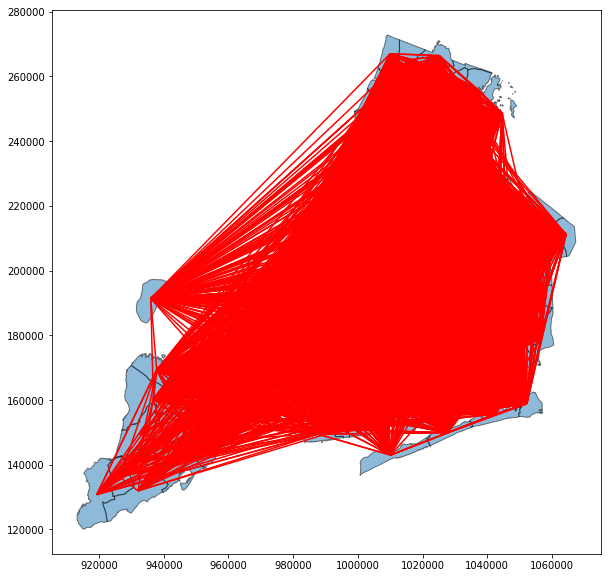

In [28]:
ax = taxi_zones.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
journeys = geopandas.GeoDataFrame(green_count_by_trip, geometry='journey')
journeys.crs = taxi_zones.crs  #{'init': 'epsg:4326'}
# journeys.to_crs(taxi_zones.crs)
journeys.plot(ax=ax, color='red')